(first-energydata-analysis)=
# Getting Started with Energy Data Analysis

:::{admonition} **Learning outcomes**
By the end of this tutorial, you will:
- Understand how to load and explore energy datasets in Python
- Learn basic techniques for data visualization
- Perform a simple analysis of energy data
:::

## Setting Up
Before we dive into data analysis, let's make sure everything is ready. We will import the necessary Python libraries and ensure our environment is configured.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import shutil
from cycler import cycler
from collections.abc import Iterable
from sklearn import linear_model
from jupytercards import display_flashcards
from jupyterquiz import display_quiz
import pygit2
print('Versions of used modules: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('shutil',shutil)
print('cycler',cycler)
print('pygit2', pygit2.__version__)
print("\n")
print('All modules imported successfully!')

Versions of used modules: 
numpy 1.26.4
matplotlib 3.9.2
pandas 2.2.2
datetime <module 'datetime' from 'C:\\Users\\Genesis\\anaconda3\\Lib\\datetime.py'>
seaborn 0.13.2
shutil <module 'shutil' from 'C:\\Users\\Genesis\\anaconda3\\Lib\\shutil.py'>
cycler <function cycler at 0x0000018EAC40CA40>
pygit2 1.16.0


All modules imported successfully!


## Loading the Data
In this step, we will load a sample energy dataset. The data contains information about household load and solar generation in hourly resolution.<br>
If you use this dataset, it is mandatory (as with all other external datasets) to cite it. The authors have even provided a citation suggestion.
<br>
- https://data.open-power-system-data.org/household_data/2020-04-15 {cite:p}`minde_household_2017`

Make sure the dataset file (`household_data_60min_singleindex.csv`) is in your working directory.

In [2]:
# Load the example dataset
data = pd.read_csv('household_data_60min_singleindex.csv')
print("File loaded successfully!")

File loaded successfully!


## Exploring the Data
Understanding the structure of your dataset is a crucial first step in any analysis. Let's examine the data to identify its key features.

With `len()`, you can check the number of rows in your dataset.

In [3]:
# Show length of the Dataset (how many rows are in the file)
print("The dataset contains " +str(len(data)) + " rows")

The dataset contains 38454 rows


`head()` and `tail()` will show you the first or the last few rows of your dataset.

In [4]:
# Display the first few rows of the dataset
data.head()

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:00:00Z  2014-12-11T18:00:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T19:00:00Z  2014-12-11T20:00:00+0100   
3  2014-12-11T20:00:00Z  2014-12-11T21:00:00+0100   
4  2014-12-11T21:00:00Z  2014-12-11T22:00:00+0100   

   DE_KN_industrial1_grid_import  DE_KN_industrial1_pv_1  \
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     NaN   
3                            NaN                     NaN   
4                            NaN                     NaN   

   DE_KN_industrial1_pv_2  DE_KN_industrial2_grid_import  \
0                     NaN                            NaN   
1                     NaN                            NaN   
2                     NaN                            NaN   
3                     NaN                            NaN   
4                     NaN                            NaN   

   DE_KN_industrial2_pv  DE_KN_industrial2_storage_charge  \
0                   NaN                               NaN   
1                   NaN                               NaN   
2                   NaN                               NaN   
3                   NaN                               NaN   
4                   NaN                               NaN   

   DE_KN_industrial2_storage_decharge  DE_KN_industrial3_area_offices  ...  \
0                                 NaN                             NaN  ...   
1                                 NaN                             NaN  ...   
2                                 NaN                             NaN  ...   
3                                 NaN                             NaN  ...   
4                                 NaN                             NaN  ...   

   DE_KN_residential5_refrigerator  DE_KN_residential5_washing_machine  \
0                              NaN                                 NaN   
1                              NaN                                 NaN   
2                              NaN                                 NaN   
3                              NaN                                 NaN   
4                              NaN                                 NaN   

   DE_KN_residential6_circulation_pump  DE_KN_residential6_dishwasher  \
0                                  NaN                            NaN   
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   

   DE_KN_residential6_freezer  DE_KN_residential6_grid_export  \
0                         NaN                             NaN   
1                         NaN                             NaN   
2                         NaN                             NaN   
3                         NaN                             NaN   
4                         NaN                             NaN   

   DE_KN_residential6_grid_import  DE_KN_residential6_pv  \
0                             NaN                    NaN   
1                             NaN                    NaN   
2                             NaN                    NaN   
3                             NaN                    NaN   
4                             NaN                    NaN   

   DE_KN_residential6_washing_machine  interpolated  
0                                 NaN           NaN  
1                                 NaN           NaN  
2                                 NaN           NaN  
3                                 NaN           NaN  
4                                 NaN           NaN  

[5 rows x 71 columns]

In [5]:
# Display the last few rows of the dataset
data.tail()

utc_timestamp        cet_cest_timestamp  \
38449  2019-05-01T18:00:00Z  2019-05-01T20:00:00+0200   
38450  2019-05-01T19:00:00Z  2019-05-01T21:00:00+0200   
38451  2019-05-01T20:00:00Z  2019-05-01T22:00:00+0200   
38452  2019-05-01T21:00:00Z  2019-05-01T23:00:00+0200   
38453  2019-05-01T22:00:00Z  2019-05-02T00:00:00+0200   

       DE_KN_industrial1_grid_import  DE_KN_industrial1_pv_1  \
38449                            NaN                     NaN   
38450                            NaN                     NaN   
38451                            NaN                     NaN   
38452                            NaN                     NaN   
38453                            NaN                     NaN   

       DE_KN_industrial1_pv_2  DE_KN_industrial2_grid_import  \
38449                     NaN                            NaN   
38450                     NaN                            NaN   
38451                     NaN                            NaN   
38452                     NaN                            NaN   
38453                     NaN                            NaN   

       DE_KN_industrial2_pv  DE_KN_industrial2_storage_charge  \
38449                   NaN                               NaN   
38450                   NaN                               NaN   
38451                   NaN                               NaN   
38452                   NaN                               NaN   
38453                   NaN                               NaN   

       DE_KN_industrial2_storage_decharge  DE_KN_industrial3_area_offices  \
38449                                 NaN                             NaN   
38450                                 NaN                             NaN   
38451                                 NaN                             NaN   
38452                                 NaN                             NaN   
38453                                 NaN                             NaN   

       ...  DE_KN_residential5_refrigerator  \
38449  ...                              NaN   
38450  ...                              NaN   
38451  ...                              NaN   
38452  ...                              NaN   
38453  ...                              NaN   

       DE_KN_residential5_washing_machine  \
38449                                 NaN   
38450                                 NaN   
38451                                 NaN   
38452                                 NaN   
38453                                 NaN   

       DE_KN_residential6_circulation_pump  DE_KN_residential6_dishwasher  \
38449                                  NaN                            NaN   
38450                                  NaN                            NaN   
38451                                  NaN                            NaN   
38452                                  NaN                            NaN   
38453                                  NaN                            NaN   

       DE_KN_residential6_freezer  DE_KN_residential6_grid_export  \
38449                         NaN                             NaN   
38450                         NaN                             NaN   
38451                         NaN                             NaN   
38452                         NaN                             NaN   
38453                         NaN                             NaN   

       DE_KN_residential6_grid_import  DE_KN_residential6_pv  \
38449                             NaN                    NaN   
38450                             NaN                    NaN   
38451                             NaN                    NaN   
38452                             NaN                    NaN   
38453                             NaN                    NaN   

       DE_KN_residential6_washing_machine  interpolated  
38449                                 NaN           NaN  
38450                                 NaN           NaN  
38451                                 NaN           NaN 

In [6]:
# Show datatypes
data.dtypes

utc_timestamp                          object
cet_cest_timestamp                     object
DE_KN_industrial1_grid_import         float64
DE_KN_industrial1_pv_1                float64
DE_KN_industrial1_pv_2                float64
                                       ...   
DE_KN_residential6_grid_export        float64
DE_KN_residential6_grid_import        float64
DE_KN_residential6_pv                 float64
DE_KN_residential6_washing_machine    float64
interpolated                           object
Length: 71, dtype: object

## Visualizing Energy Data
Visualization helps us understand trends and patterns in the data.

The website where we downloaded the data, contains additional information explaining what each value represents. <br>
The date entries need to be formatted so they can be properly read by the program.
 

Open the website https://data.open-power-system-data.org/household_data/2020-04-15 and scroll down to `household data 60min singleindex.csv`. <br>
There you can see, that the `utc_timestamp` is formatted like `datetime (fmt:%Y-%m-%dT%H%M%SZ)`. <br>
To draw a correct diagram, we use this given format.

In [9]:
data['time'] = data.utc_timestamp.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))

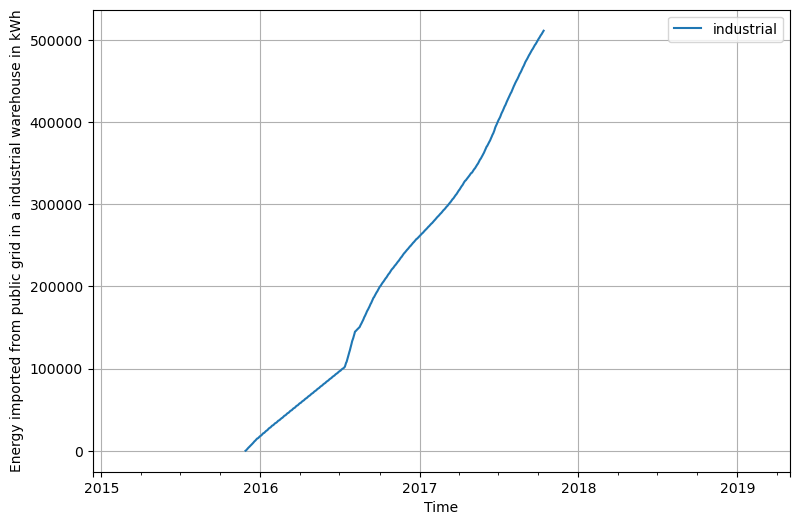

In [10]:
# Plot energy consumption over time
data.rename(columns = {'DE_KN_industrial1_grid_import':'industrial'}, inplace = True)
data.plot(x = 'time', y = 'industrial', figsize=(9,6))
plt.xlabel('Time')
plt.ylabel('Energy imported from public grid in a industrial warehouse in kWh');
plt.grid()
plt.show()

### Cleaning the Data
As you can see, the data contains many values that are NaN (Not a Number). Therefore, we need to clean the data and remove unnecessary values.<br>
For this you can use the function `.dropna()` 

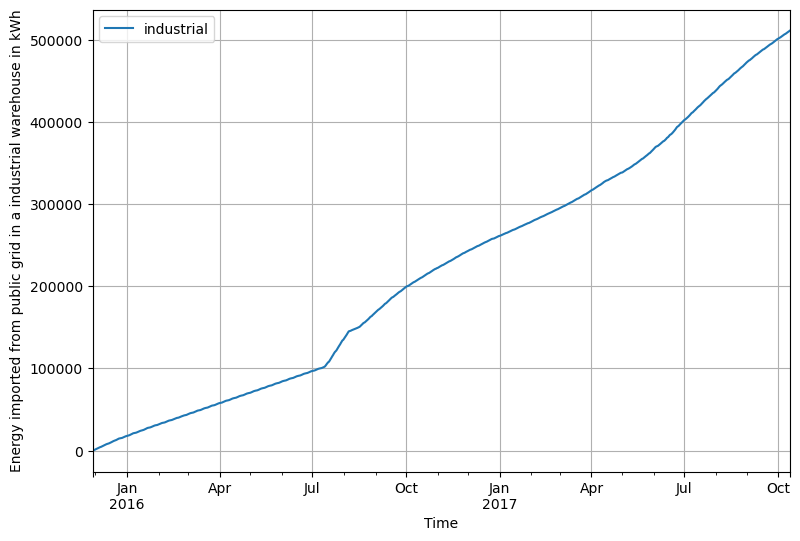

In [15]:
data_cleaned = data.dropna(subset=['time','industrial'])
data_cleaned.plot(x = 'time', y = 'industrial', figsize=(9,6))
plt.xlabel('Time')
plt.ylabel('Energy imported from public grid in a industrial warehouse in kWh');
plt.grid()
plt.show()

## Conclusion
In this tutorial, you learned how to:
- Load and inspect an energy dataset
- Handle NaN values
- Create visualizations to analyze trends

:::{bibliography}
:filter: docname in docnames
:::